In [4]:
from google.colab import files


uploaded = files.upload()

Saving drugsComTrain_raw.csv to drugsComTrain_raw.csv


In [5]:
from google.colab import files


uploaded2 = files.upload()

Saving drugsComTest_raw.csv to drugsComTest_raw.csv


In [7]:
import io
import pandas as pd

# Read the TSV file with the correct delimiter (tab)
data1 = pd.read_csv(io.BytesIO(uploaded['drugsComTrain_raw.csv']))
data2 = pd.read_csv(io.BytesIO(uploaded2['drugsComTest_raw.csv']))


In [9]:
data1.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [10]:
data2.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [11]:
print("Shape of train :", data1.shape)
print("Shape of test :", data2.shape)

Shape of train : (161297, 7)
Shape of test : (53766, 7)


In [12]:

#Rename column in test data
data2.columns = ['uniqueID','drugName','condition','review','rating','date','usefulCount']

# combine both datasets for better analysis

data = pd.concat([data1, data2])
data.shape

(215063, 7)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215063 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     215063 non-null  int64 
 1   drugName     215063 non-null  object
 2   condition    213869 non-null  object
 3   review       215063 non-null  object
 4   rating       215063 non-null  int64 
 5   date         215063 non-null  object
 6   usefulCount  215063 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 13.1+ MB


In [14]:
data.describe()

,uniqueID,rating,usefulCount
count,215063.000000,215063.000000,215063.000000
mean,116039.364814,6.990008,28.001004
std,67007.913366,3.275554,36.346069
min,0.000000,1.000000,0.000000
25%,58115.500000,5.000000,6.000000
50%,115867.000000,8.000000,16.000000
75%,173963.500000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [15]:
print(data['drugName'].unique(),"\t",data['drugName'].nunique())
print('____________________________________________________')
print(data['condition'].unique(),"\t",data['condition'].nunique())

['Valsartan' 'Guanfacine' 'Lybrel' ... 'Pegaptanib' 'FiberCon'
 'Allergy DN PE'] 	 3671
____________________________________________________
['Left Ventricular Dysfunction' 'ADHD' 'Birth Control' 'Opiate Dependence'
 'Benign Prostatic Hyperplasia' 'Emergency Contraception'
 'Bipolar Disorde' 'Epilepsy' 'Migraine Prevention' 'Depression'
 "Crohn's Disease" 'Cough' 'Obesity' 'Urinary Tract Infection'
 'ibromyalgia' 'Chronic Myelogenous Leukemia' 'HIV Infection' 'Insomnia'
 'Rheumatoid Arthritis' 'Vaginal Yeast Infection' 'Chlamydia Infection'
 'Hirsutism' 'Panic Disorde' 'Migraine' nan 'Pain'
 'Irritable Bowel Syndrome' 'Osteoarthritis' 'Constipation'
 'Bowel Preparation' 'Psychosis' 'Muscle Spasm' 'Hepatitis C'
 'Overactive Bladde' 'Diabetes, Type 2' 'Asthma, Maintenance'
 'Non-Small Cell Lung Cance' 'Schizophrenia' 'Dysuria' 'Smoking Cessation'
 'Anxiety' 'Acne' 'emale Infertility' 'Constipation, Acute'
 'Constipation, Drug Induced' 'Erectile Dysfunction'
 'Trigeminal Neuralgia' 'Under

In [16]:
data.isnull().any()

uniqueID       False
drugName       False
condition       True
review         False
rating         False
date           False
usefulCount    False
dtype: bool

In [17]:
data['condition'].isnull().sum()

1194

In [18]:
data.dropna(axis = 0)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
...,...,...,...,...,...,...,...
53761,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,13-Sep-14,43
53762,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,8-Oct-16,11
53763,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7
53764,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,28-Nov-11,20


In [19]:
# Changing the format of date column.
data['date'] = pd.to_datetime(data['date'])
data


,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37
...,...,...,...,...,...,...,...
53761,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,2014-09-13,43
53762,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,2016-10-08,11
53763,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,2010-11-15,7
53764,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,2011-11-28,20


In [25]:
from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
data.to_csv('drive/My Drive/DrugReview_processed.csv',index=False)

In [27]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.1 MB/s eta 0:00:00


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
data_drugs = pd.read_csv('drive/My Drive/DrugReview_processed.csv')

In [35]:

data_drugs.drop(['uniqueID', 'date'], axis = 1, inplace=True)

In [36]:
data_drugs = data_drugs.rename(columns={"condition": "Disease"})

In [37]:
data_drugs.dropna(axis = 0, inplace=True)
data_drugs.sort_values(by = ['Disease'], ascending= False , inplace= True)
data_drugs.head()


,drugName,Disease,review,rating,usefulCount
101227,Nabumetone,zen Shoulde,"""The only side effect I have experienced with ...",1,6
171789,Aleve,zen Shoulde,"""Very little relief. I finished PT and after ...",2,6
79807,Indomethacin,zen Shoulde,"""It works.""",10,12
49083,Indocin,zen Shoulde,"""It works.""",10,12
113572,Diclofenac,zen Shoulde,"""While taking this medication I had increased ...",9,13


In [39]:

data_drugs['Disease'].unique

<bound method Series.unique of 101227                                   zen Shoulde
171789                                   zen Shoulde
79807                                    zen Shoulde
49083                                    zen Shoulde
113572                                   zen Shoulde
                             ...                    
135222    0</span> users found this comment helpful.
12332     0</span> users found this comment helpful.
154027    0</span> users found this comment helpful.
6584      0</span> users found this comment helpful.
85676     0</span> users found this comment helpful.
Name: Disease, Length: 213869, dtype: object>

In [40]:
data_drugs['Disease'] = data_drugs['Disease'].str.lower()

In [41]:
merged_data = data_drugs

In [42]:
merged_data.head()


,drugName,Disease,review,rating,usefulCount
101227,Nabumetone,zen shoulde,"""The only side effect I have experienced with ...",1,6
171789,Aleve,zen shoulde,"""Very little relief. I finished PT and after ...",2,6
79807,Indomethacin,zen shoulde,"""It works.""",10,12
49083,Indocin,zen shoulde,"""It works.""",10,12
113572,Diclofenac,zen shoulde,"""While taking this medication I had increased ...",9,13


In [43]:
merged_data.shape

(213869, 5)

In [44]:
merged_data.columns = ['Drug', 'Disease', 'Review','Rating' ,'UsefulCount']

In [45]:
merged_data['Disease'].nunique()

916

In [46]:
merged_data['Drug'].nunique()

3667

In [47]:

merged_data.head()

,Drug,Disease,Review,Rating,UsefulCount
101227,Nabumetone,zen shoulde,"""The only side effect I have experienced with ...",1,6
171789,Aleve,zen shoulde,"""Very little relief. I finished PT and after ...",2,6
79807,Indomethacin,zen shoulde,"""It works.""",10,12
49083,Indocin,zen shoulde,"""It works.""",10,12
113572,Diclofenac,zen shoulde,"""While taking this medication I had increased ...",9,13


In [52]:
data.to_csv('drive/My Drive/Merged_Dataset.csv,index=False')

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [55]:
merged_data = pd.read_csv('drive/My Drive/Merged_Dataset.csv,index=False')

In [56]:
merged_data.head()

,Unnamed: 0,uniqueID,drugName,condition,review,rating,date,usefulCount
0,0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27
1,1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192
2,2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17
3,3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10
4,4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37


In [57]:
merged_data = merged_data.drop(['Unnamed: 0'],axis=1)

In [59]:
merged_data = merged_data.drop(['uniqueID'],axis=1)

In [60]:
merged_data.head()

,drugName,condition,review,rating,date,usefulCount
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37


In [61]:
merged_data = merged_data.drop(['date'],axis=1)

In [63]:
merged_data.head()

,drugName,condition,review,rating,usefulCount
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,27
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,192
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,10
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,37


In [65]:
review_list = list(merged_data.review)

In [66]:
sentiments = []
positive = []
negative = []
neutral = []
compound = []


for text in review_list:

  # Running Vader Analysis on each review
  com = analyser.polarity_scores(text)["compound"]
  pos = analyser.polarity_scores(text)["pos"]
  neu = analyser.polarity_scores(text)["neu"]
  neg = analyser.polarity_scores(text)["neg"]

  # Adding each value to the corresponding array
  positive.append(pos)
  negative.append(neg)
  neutral.append(neu)
  compound.append(com)
  sentiments.append({"review":text,
                     "Positive": pos,
                     "Negative": neu,
                     "Neutral": neg,
                     "Compound": com})

sentiments_pd = pd.DataFrame.from_dict(sentiments)

In [67]:

sentiments_pd

,review,Positive,Negative,Neutral,Compound
0,"""It has no side effect, I take it in combinati...",0.000,0.879,0.121,-0.2960
1,"""My son is halfway through his fourth week of ...",0.108,0.874,0.018,0.9174
2,"""I used to take another oral contraceptive, wh...",0.080,0.861,0.059,0.6160
3,"""This is my first time using any form of birth...",0.089,0.885,0.026,0.7184
4,"""Suboxone has completely turned my life around...",0.168,0.771,0.061,0.9403
...,...,...,...,...,...
215058,"""I have taken Tamoxifen for 5 years. Side effe...",0.065,0.785,0.150,-0.8924
215059,"""I&#039;ve been taking Lexapro (escitaploprgra...",0.168,0.748,0.084,0.9223
215060,"""I&#039;m married, 34 years old and I have no ...",0.037,0.848,0.115,-0.8767
215061,"""I was prescribed Nucynta for severe neck/shou...",0.000,0.667,0.333,-0.9260


In [68]:

merged_data

,drugName,condition,review,rating,usefulCount
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,27
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,192
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,10
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,37
...,...,...,...,...,...
215058,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,43
215059,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,11
215060,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,7
215061,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,20


In [69]:
#Adding the sentiment analysis columns to the merged dataset.
merged_data["Positive"] = positive
merged_data["Negative"] = negative
merged_data["Neutral"] = neutral
merged_data["Compound"] = compound
merged_data["Review_Sentiment"] = ''

In [70]:
merged_data.head()

,drugName,condition,review,rating,usefulCount,Positive,Negative,Neutral,Compound,Review_Sentiment
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,27,0.000,0.121,0.879,-0.2960,
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,192,0.108,0.018,0.874,0.9174,
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,17,0.080,0.059,0.861,0.6160,
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,10,0.089,0.026,0.885,0.7184,
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,37,0.168,0.061,0.771,0.9403,


In [71]:
merged_data.loc[merged_data['Compound'] >= 0.05, 'Review_Sentiment'] = 'Positive'
merged_data.loc[merged_data['Compound'] <= -0.05, 'Review_Sentiment'] = 'Negative'

In [72]:
merged_data

,drugName,condition,review,rating,usefulCount,Positive,Negative,Neutral,Compound,Review_Sentiment
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,27,0.000,0.121,0.879,-0.2960,Negative
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,192,0.108,0.018,0.874,0.9174,Positive
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,17,0.080,0.059,0.861,0.6160,Positive
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,10,0.089,0.026,0.885,0.7184,Positive
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,37,0.168,0.061,0.771,0.9403,Positive
...,...,...,...,...,...,...,...,...,...,...
215058,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,43,0.065,0.150,0.785,-0.8924,Negative
215059,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,11,0.168,0.084,0.748,0.9223,Positive
215060,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,7,0.037,0.115,0.848,-0.8767,Negative
215061,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,20,0.000,0.333,0.667,-0.9260,Negative


In [73]:
merged_data["Review_Sentiment"].replace('', 'Neutral', inplace = True)

In [74]:
#Dropping positive, negative, neutral and compound columns.
merged_data = merged_data.drop(columns = ["Positive", "Negative", "Neutral", "Compound"])

In [75]:
merged_data.shape

(215063, 6)

In [78]:
merged_data = merged_data[["condition", "drugName","review", "Review_Sentiment", "rating", "usefulCount"]]

In [79]:
merged_data

,condition,drugName,review,Review_Sentiment,rating,usefulCount
0,Left Ventricular Dysfunction,Valsartan,"""It has no side effect, I take it in combinati...",Negative,9,27
1,ADHD,Guanfacine,"""My son is halfway through his fourth week of ...",Positive,8,192
2,Birth Control,Lybrel,"""I used to take another oral contraceptive, wh...",Positive,5,17
3,Birth Control,Ortho Evra,"""This is my first time using any form of birth...",Positive,8,10
4,Opiate Dependence,Buprenorphine / naloxone,"""Suboxone has completely turned my life around...",Positive,9,37
...,...,...,...,...,...,...
215058,"Breast Cancer, Prevention",Tamoxifen,"""I have taken Tamoxifen for 5 years. Side effe...",Negative,10,43
215059,Anxiety,Escitalopram,"""I&#039;ve been taking Lexapro (escitaploprgra...",Positive,9,11
215060,Birth Control,Levonorgestrel,"""I&#039;m married, 34 years old and I have no ...",Negative,8,7
215061,Pain,Tapentadol,"""I was prescribed Nucynta for severe neck/shou...",Negative,1,20


<Axes: xlabel='Sentiment'>

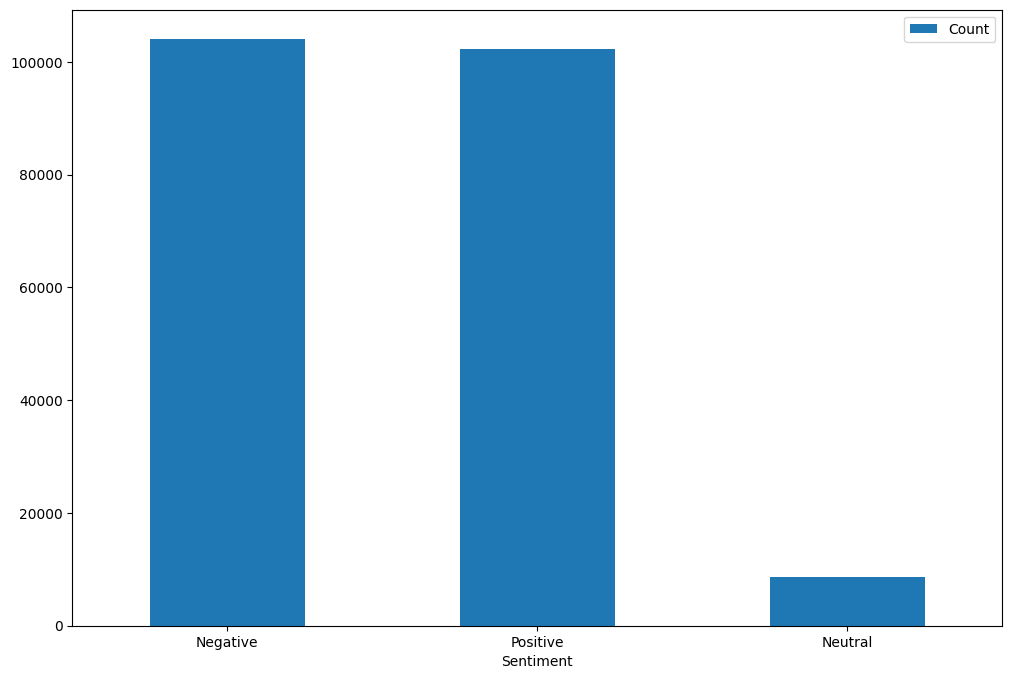

In [80]:

import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the sentiment column unique value and their counts.
sentiment_values = merged_data['Review_Sentiment'].unique()

senti = pd.DataFrame({'Sentiment':sentiment_values, 'Count': merged_data['Review_Sentiment'].value_counts()})
senti.plot.bar(x='Sentiment', y='Count', rot=0, figsize=(12,8))

In [88]:

#Exporting data to csv.
merged_data.to_csv(r'drive/My Drive/Drug_Recommender.csv',index=False)

In [90]:
data = pd.read_csv('drive/My Drive/Drug_Recommender.csv')

In [91]:
data.head()

,condition,drugName,review,Review_Sentiment,rating,usefulCount
0,Left Ventricular Dysfunction,Valsartan,"""It has no side effect, I take it in combinati...",Negative,9,27
1,ADHD,Guanfacine,"""My son is halfway through his fourth week of ...",Positive,8,192
2,Birth Control,Lybrel,"""I used to take another oral contraceptive, wh...",Positive,5,17
3,Birth Control,Ortho Evra,"""This is my first time using any form of birth...",Positive,8,10
4,Opiate Dependence,Buprenorphine / naloxone,"""Suboxone has completely turned my life around...",Positive,9,37


In [92]:
data = data.sort_values(['drugName'])

In [93]:
def wavg(group, avg_name, weight_name):
    d = group[avg_name]
    w = group[weight_name]
    try:
        return (d * w).sum() / w.sum()
    except ZeroDivisionError:
        return d.mean()

In [94]:
wavg(data, "rating", "usefulCount")

7.9885692081342015

In [95]:
data.groupby(["condition", "drugName"]).apply(wavg, "rating", "usefulCount")

condition                                   drugName         
0</span> users found this comment helpful.  Aricept                    NaN
                                            Atripla                    NaN
                                            Aviane                     NaN
                                            Bepreve                    NaN
                                            Blisovi Fe 1 / 20          NaN
                                                                   ...    
zen Shoulde                                 Indomethacin         10.000000
                                            Nabumetone            7.425532
                                            Naproxen              3.708333
                                            Relafen               7.863636
                                            Voltaren              6.800000
Length: 9446, dtype: float64

In [96]:
data_wavg = data.groupby(["drugName"], as_index=False).apply(wavg, "rating", "usefulCount")

In [102]:
data_wavg = data_wavg.drop(['drugName'],axis=1)

In [103]:
data_wavg = pd.DataFrame(data_wavg)
data_wavg.columns = ['Rating_Wavg']

In [104]:
data_wavg

,Rating_Wavg
0,10.000000
1,10.000000
2,8.758047
3,10.000000
4,9.000000
...,...
3666,1.428571
3667,10.000000
3668,8.203840
3669,9.382716


In [106]:
d1 = data['drugName'].unique().tolist()
d1 = pd.DataFrame(d1)
d1.columns = ['drugName']
d1


,drugName
0,A + D Cracked Skin Relief
1,A / B Otic
2,Abacavir / dolutegravir / lamivudine
3,Abacavir / lamivudine
4,Abacavir / lamivudine / zidovudine
...,...
3666,ZzzQuil
3667,depo-subQ provera 104
3668,ella
3669,femhrt


In [107]:
result = pd.concat([d1, data_wavg], axis=1, join='inner')
result

,drugName,Rating_Wavg
0,A + D Cracked Skin Relief,10.000000
1,A / B Otic,10.000000
2,Abacavir / dolutegravir / lamivudine,8.758047
3,Abacavir / lamivudine,10.000000
4,Abacavir / lamivudine / zidovudine,9.000000
...,...,...
3666,ZzzQuil,1.428571
3667,depo-subQ provera 104,10.000000
3668,ella,8.203840
3669,femhrt,9.382716


In [108]:
merged_wavg = pd.merge(result, data, on='drugName')

In [110]:
merged_wavg.drop(columns=['rating'], inplace=True)
merged_wavg = merged_wavg[['condition','drugName', 'review', 'Review_Sentiment', 'Rating_Wavg', 'usefulCount']]

In [111]:
merged_wavg

,condition,drugName,review,Review_Sentiment,Rating_Wavg,usefulCount
0,Bacterial Skin Infection,A + D Cracked Skin Relief,"""I have severe cracked skin on my hands. I&#0...",Positive,10.000000,6
1,Otitis Media,A / B Otic,"""These drops helped me so much. I was in sever...",Negative,10.000000,18
2,Otitis Media,A / B Otic,"""It numbs the pain. It makes my ear feel heavi...",Positive,10.000000,20
3,HIV Infection,Abacavir / dolutegravir / lamivudine,"""I am NOT new to HIV or HIV treatment. I&#039;...",Negative,8.758047,14
4,HIV Infection,Abacavir / dolutegravir / lamivudine,"""I got diagnosis very early, within 7 days aft...",Negative,8.758047,12
...,...,...,...,...,...,...
215058,Acne,femhrt,"""femhrt took away my hot flashes within a week...",Negative,9.382716,2
215059,0</span> users found this comment helpful.,femhrt,"""I was on femHRT for four months and had BV (b...",Negative,9.382716,0
215060,Menstrual Disorders,femhrt,"""Hot flashes completely gone in less than 2 we...",Positive,9.382716,7
215061,Postmenopausal Symptoms,femhrt,"""This medication completely changed my life fo...",Negative,9.382716,42


In [112]:
merged_wavg['condition'].nunique()

916

In [113]:
merged_wavg = merged_wavg.sort_values(['condition','Rating_Wavg'],ascending=False, ignore_index=True).groupby('condition').head(10060)
merged_wavg

,condition,drugName,review,Review_Sentiment,Rating_Wavg,usefulCount
0,zen Shoulde,Voltaren,"""Great help""",Positive,8.919974,33
1,zen Shoulde,Voltaren,"""The medication has been somewhat helpful with...",Negative,8.919974,22
2,zen Shoulde,Diclofenac,"""The medication has been somewhat helpful with...",Negative,8.665384,22
3,zen Shoulde,Diclofenac,"""This medication has been a God send for me. ...",Negative,8.665384,11
4,zen Shoulde,Diclofenac,"""Great help""",Positive,8.665384,33
...,...,...,...,...,...,...
213864,0</span> users found this comment helpful.,Depo-Provera,"""took depo to stop dysphoria from menstruation...",Positive,4.970040,0
213865,0</span> users found this comment helpful.,Depo-Provera,"""I have liked depo, but today I started bleedi...",Positive,4.970040,0
213866,0</span> users found this comment helpful.,Depo-Provera,"""I was on this birth control for about a year ...",Positive,4.970040,0
213867,0</span> users found this comment helpful.,Ogestrel-28,"""I have been on many different birth control p...",Positive,3.285714,0


In [114]:
merged_wavg = merged_wavg.to_csv("drive/My Drive/Drug_Recommender.csv", index=False)
merged_wavg = pd.read_csv("drive/My Drive/Drug_Recommender.csv")
merged_wavg

,condition,drugName,review,Review_Sentiment,Rating_Wavg,usefulCount
0,zen Shoulde,Voltaren,"""Great help""",Positive,8.919974,33
1,zen Shoulde,Voltaren,"""The medication has been somewhat helpful with...",Negative,8.919974,22
2,zen Shoulde,Diclofenac,"""The medication has been somewhat helpful with...",Negative,8.665384,22
3,zen Shoulde,Diclofenac,"""This medication has been a God send for me. ...",Negative,8.665384,11
4,zen Shoulde,Diclofenac,"""Great help""",Positive,8.665384,33
...,...,...,...,...,...,...
183384,0</span> users found this comment helpful.,Depo-Provera,"""took depo to stop dysphoria from menstruation...",Positive,4.970040,0
183385,0</span> users found this comment helpful.,Depo-Provera,"""I have liked depo, but today I started bleedi...",Positive,4.970040,0
183386,0</span> users found this comment helpful.,Depo-Provera,"""I was on this birth control for about a year ...",Positive,4.970040,0
183387,0</span> users found this comment helpful.,Ogestrel-28,"""I have been on many different birth control p...",Positive,3.285714,0


In [115]:
merged_wavg = merged_wavg.drop( merged_wavg[merged_wavg['Review_Sentiment'] == "Negative"].index)
merged_wavg = merged_wavg.drop( merged_wavg[merged_wavg['Review_Sentiment'] == "Neutral"].index)

In [116]:
# taking predicted disease as input and recommending drug based on highest weighted average of ratings
groupedByCount = merged_wavg.groupby(['condition', 'drugName', 'Rating_Wavg'])['usefulCount'].sum().reset_index()

In [117]:
groupedByCount

,condition,drugName,Rating_Wavg,usefulCount
0,0</span> users found this comment helpful.,Aviane,7.616742,0
1,0</span> users found this comment helpful.,Bepreve,7.089552,0
2,0</span> users found this comment helpful.,Chantix,9.132577,0
3,0</span> users found this comment helpful.,Cryselle,6.859487,0
4,0</span> users found this comment helpful.,Depo-Provera,4.970040,0
...,...,...,...,...
7044,zen Shoulde,Ibuprofen,8.443128,0
7045,zen Shoulde,Nabumetone,7.704819,50
7046,zen Shoulde,Naproxen,8.094432,6
7047,zen Shoulde,Relafen,7.980456,50


from matplotlib import pyplot as plt
groupedByCount['Rating_Wavg'].plot(kind='hist', bins=20, title='Rating_Wavg')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
groupedByCount['usefulCount'].plot(kind='hist', bins=20, title='usefulCount')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
groupedByCount.plot(kind='scatter', x='Rating_Wavg', y='usefulCount', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
groupedByCount['Rating_Wavg'].plot(kind='line', figsize=(8, 4), title='Rating_Wavg')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
groupedByCount['usefulCount'].plot(kind='line', figsize=(8, 4), title='usefulCount')
plt.gca().spines[['top', 'right']].set_visible(False)

In [118]:
groupedByDisease = groupedByCount.groupby('condition')

In [174]:
predicted_drug = pd.DataFrame(groupedByDisease.get_group("Bronchitis").nlargest(3, ['Rating_Wavg', 'usefulCount']))
predicted_drug

,condition,drugName,Rating_Wavg,usefulCount
1720,Bronchitis,Cedax,9.461538,6
1724,Bronchitis,Ceftibuten,9.461538,6
1726,Bronchitis,Ceftriaxone,9.106838,2


In [175]:
print("Recommended drugs for this disease are:\n ", predicted_drug["drugName"].unique())

Recommended drugs for this disease are:
  ['Cedax' 'Ceftibuten' 'Ceftriaxone']
